In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1 = pd.read_csv('../Data/Grouped_data/monthwise_data_biographic.csv')
df2 = pd.read_csv('../Data/Grouped_data/monthwise_data_demographic.csv')
df3 = pd.read_csv('../Data/Grouped_data/monthwise_data_enrollments.csv')

### monthly enrollmets and updates

In [3]:
# Set 'date' as the index for all three
df1.set_index('date', inplace=True)
df2.set_index('date', inplace=True)
df3.set_index('date', inplace=True)

# Now concat works correctly because they share the same index
df = pd.concat([df1, df2, df3], axis=1)

# Optional: if you want 'date' back as a column
df.reset_index(inplace=True)

In [4]:
df 

,date,bio_age_5_17,bio_age_17_,total_biometric,demo_age_5_17,demo_age_17_,total_demographic,age_0_5,age_5_17,age_18_greater,total_enrollments
0,2025-03,3733578,4588644,8322222,721108,7469044,8190152,5367,7407,3808,16582
1,2025-04,4356896,4284783,8641679,119936,787346,907282,141154,91371,24913,257438
2,2025-05,3868247,4011709,7879956,123211,816557,939768,95342,71690,16584,183616
3,2025-06,3710149,4189140,7899289,122903,918041,1040944,98943,99911,16880,215734
4,2025-07,4499057,5293495,9792552,195587,1315305,1510892,318352,263333,35183,616868
5,2025-09,3545070,2968437,6513507,630827,5342432,5973259,995612,465401,14854,1475867
6,2025-10,2041493,2192361,4233854,366712,3466443,3833155,536781,227414,15421,779616
7,2025-11,3344597,3426207,6770804,617192,6467113,7084305,742020,286115,24438,1052573
8,2025-12,4357560,3849636,8207196,700261,6417539,7117800,540818,178266,14168,733252


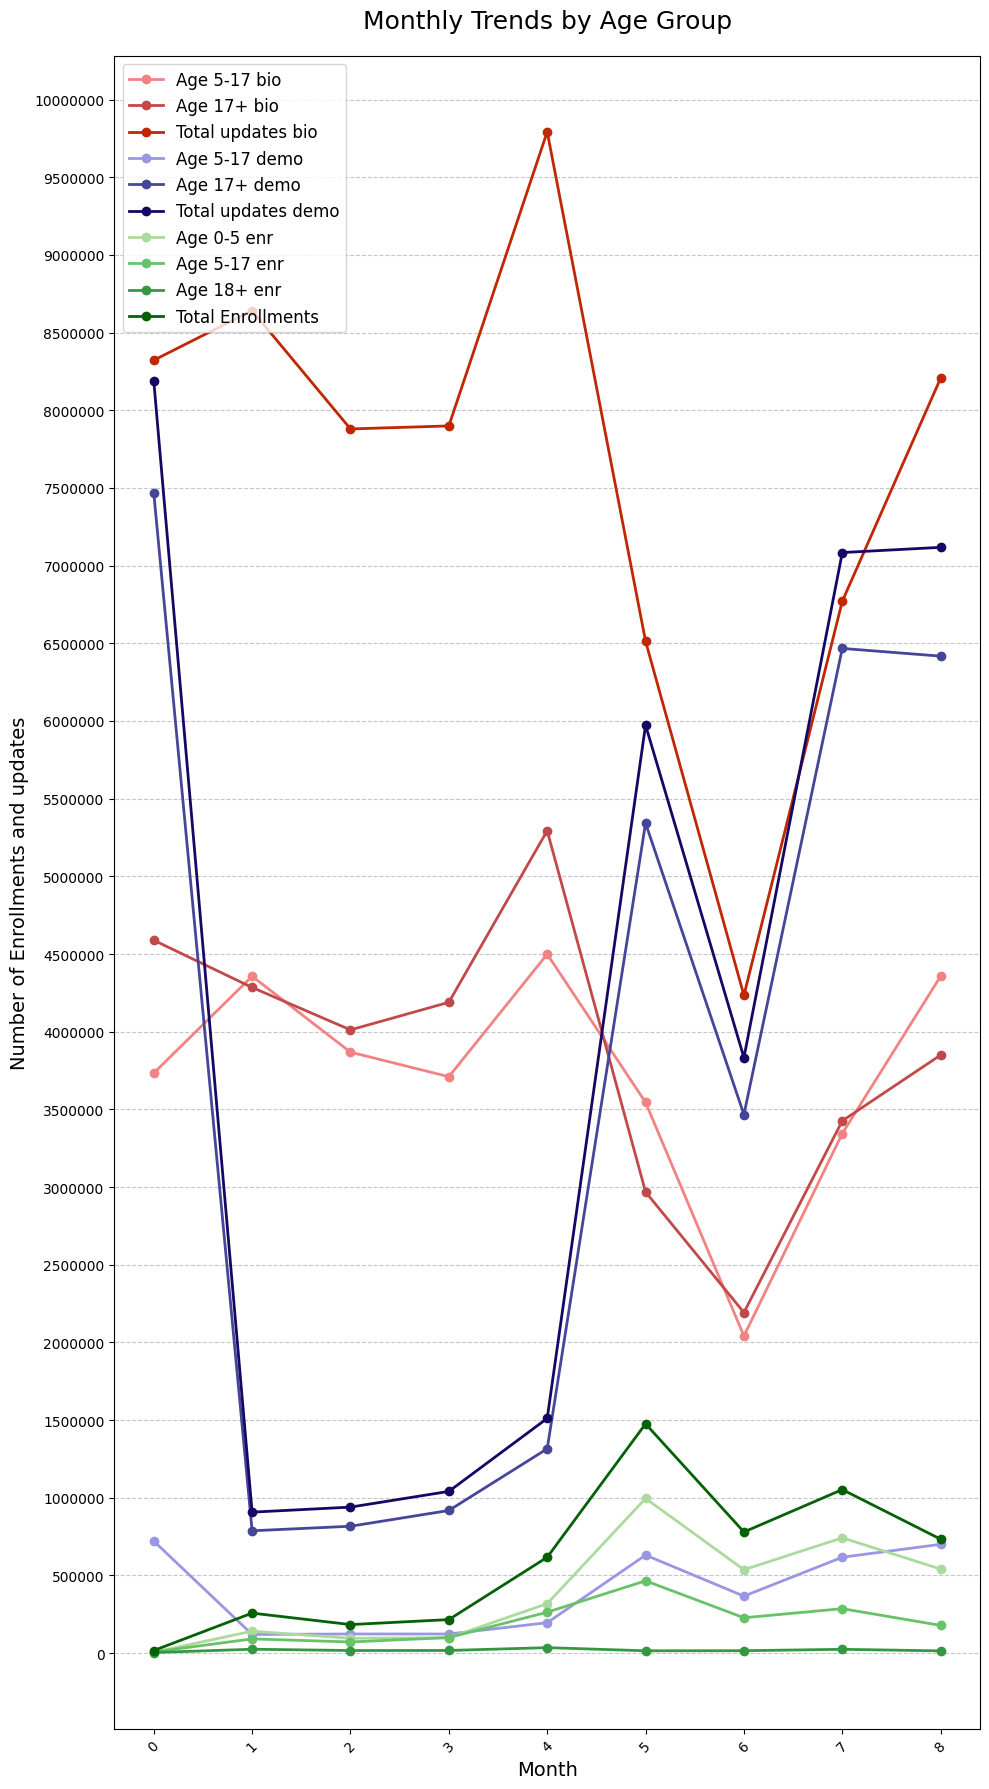

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MultipleLocator

# 1. Prepare the data
# We assume 'monthwise_sum' is your DataFrame indexed by month
dates = df.index.astype(str).tolist()

# 2. Create the Line Chart
fig, ax = plt.subplots(figsize=(10, 18))

# Plot lines for each age group
ax.plot(dates, df['bio_age_5_17'], label='Age 5-17 bio', color="#f38383", marker='o', linewidth=2)
ax.plot(dates, df['bio_age_17_'], label='Age 17+ bio', color="#C24949", marker='o', linewidth=2)
ax.plot(dates, df['total_biometric'], label='Total updates bio', color="#C02705", marker='o', linewidth=2)

ax.plot(dates, df['demo_age_5_17'], label='Age 5-17 demo', color="#9996E3", marker='o', linewidth=2)
ax.plot(dates, df['demo_age_17_'], label='Age 17+ demo', color="#454697", marker='o', linewidth=2)
ax.plot(dates, df['total_demographic'], label='Total updates demo', color="#150764", marker='o', linewidth=2)

ax.plot(dates, df['age_0_5'], label='Age 0-5 enr', color="#acda9d", marker='o', linewidth=2)
ax.plot(dates, df['age_5_17'], label='Age 5-17 enr', color="#67C26A", marker='o', linewidth=2)
ax.plot(dates, df['age_18_greater'], label='Age 18+ enr', color="#349842", marker='o', linewidth=2)
ax.plot(dates, df['total_enrollments'], label='Total Enrollments', color="#056105", marker='o', linewidth=2)

# 3. Set the Y-axis interval to 100,000
ax.yaxis.set_major_locator(MultipleLocator(500000))

# 4. Format for Exact Numbers (No Scientific Notation)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')

# 5. Customize the Plot appearance
ax.set_title('Monthly Trends by Age Group', fontsize=18, pad=20)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Enrollments and updates', fontsize=14)

# Rotate date labels for better fit
plt.xticks(rotation=45, fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=12, loc='upper left')

plt.tight_layout()
plt.show()

This graph shows
- India’s Aadhaar system in 2025 is no longer an enrollment-first system, but a maintenance-first identity infrastructure where biometric refresh, demographic correction, and child-based enrollment move in tightly coordinated national waves driven by policy campaigns rather than organic demand.

- The synchronized spikes across biometric updates, demographic corrections, and Aadhaar enrollments reveal that India’s Aadhaar ecosystem operates through centrally coordinated national campaigns rather than organic user-driven activity. September and November 2025 represent large-scale Aadhaar mission months, during which identity creation (enrollment), identity validation (biometric updates), and identity correction (demographic updates) were executed simultaneously. The overwhelming dominance of child enrollments (0–17 years) confirms Aadhaar’s transition from an adult coverage program to a lifelong digital identity system beginning at birth.



### Statewise enrollmets and updates

In [6]:
df11 = pd.read_csv('../Data/Grouped_data/statewise_data_biographic.csv')
df22 = pd.read_csv('../Data/Grouped_data/statewise_data_demographic.csv')
df33 = pd.read_csv('../Data/Grouped_data/statewise_data_enrollments.csv')

In [7]:
# Set 'date' as the index for all three
df11.set_index('state_clean', inplace=True)
df22.set_index('state_clean', inplace=True)
df33.set_index('state_clean', inplace=True)

# Now concat works correctly because they share the same index
dff = pd.concat([df11, df22, df33], axis=1)

# Optional: if you want 'date' back as a column
dff.reset_index(inplace=True)

In [8]:
dff = dff.sort_values(by='total_enrollments', ascending=False)
dff.set_index('state_clean', inplace=True)
dff

,bio_age_5_17,bio_age_17_,total_biometric,demo_age_5_17,demo_age_17_,total_demographic,age_0_5,age_5_17,age_18_greater,total_enrollments
state_clean,,,,,,,,,,
Uttar Pradesh,6076420,3290663,9367083,603453,5857058,6460511,511727,473205,17699,1002631
Bihar,2160544,2618424,4778968,285883,3352962,3638845,254911,327043,11799,593753
Madhya Pradesh,3148670,2671066,5819736,289711,1814924,2104635,363244,115172,9476,487892
West Bengal,1023454,1458738,2482192,177260,2667088,2844348,270419,90335,8495,369249
Maharashtra,3437083,5583627,9020710,204293,3620599,3824892,274274,81069,8103,363446
Rajasthan,2032783,1895214,3927997,189180,1869717,2058897,224977,110131,5483,340591
Gujarat,1437932,1709956,3147888,155182,1202933,1358115,188709,70270,16063,275042
Assam,574106,371044,945150,62971,692126,755097,137970,64834,22555,225359
Karnataka,1228292,1373795,2602087,195757,1059032,1254789,176178,33402,10038,219618


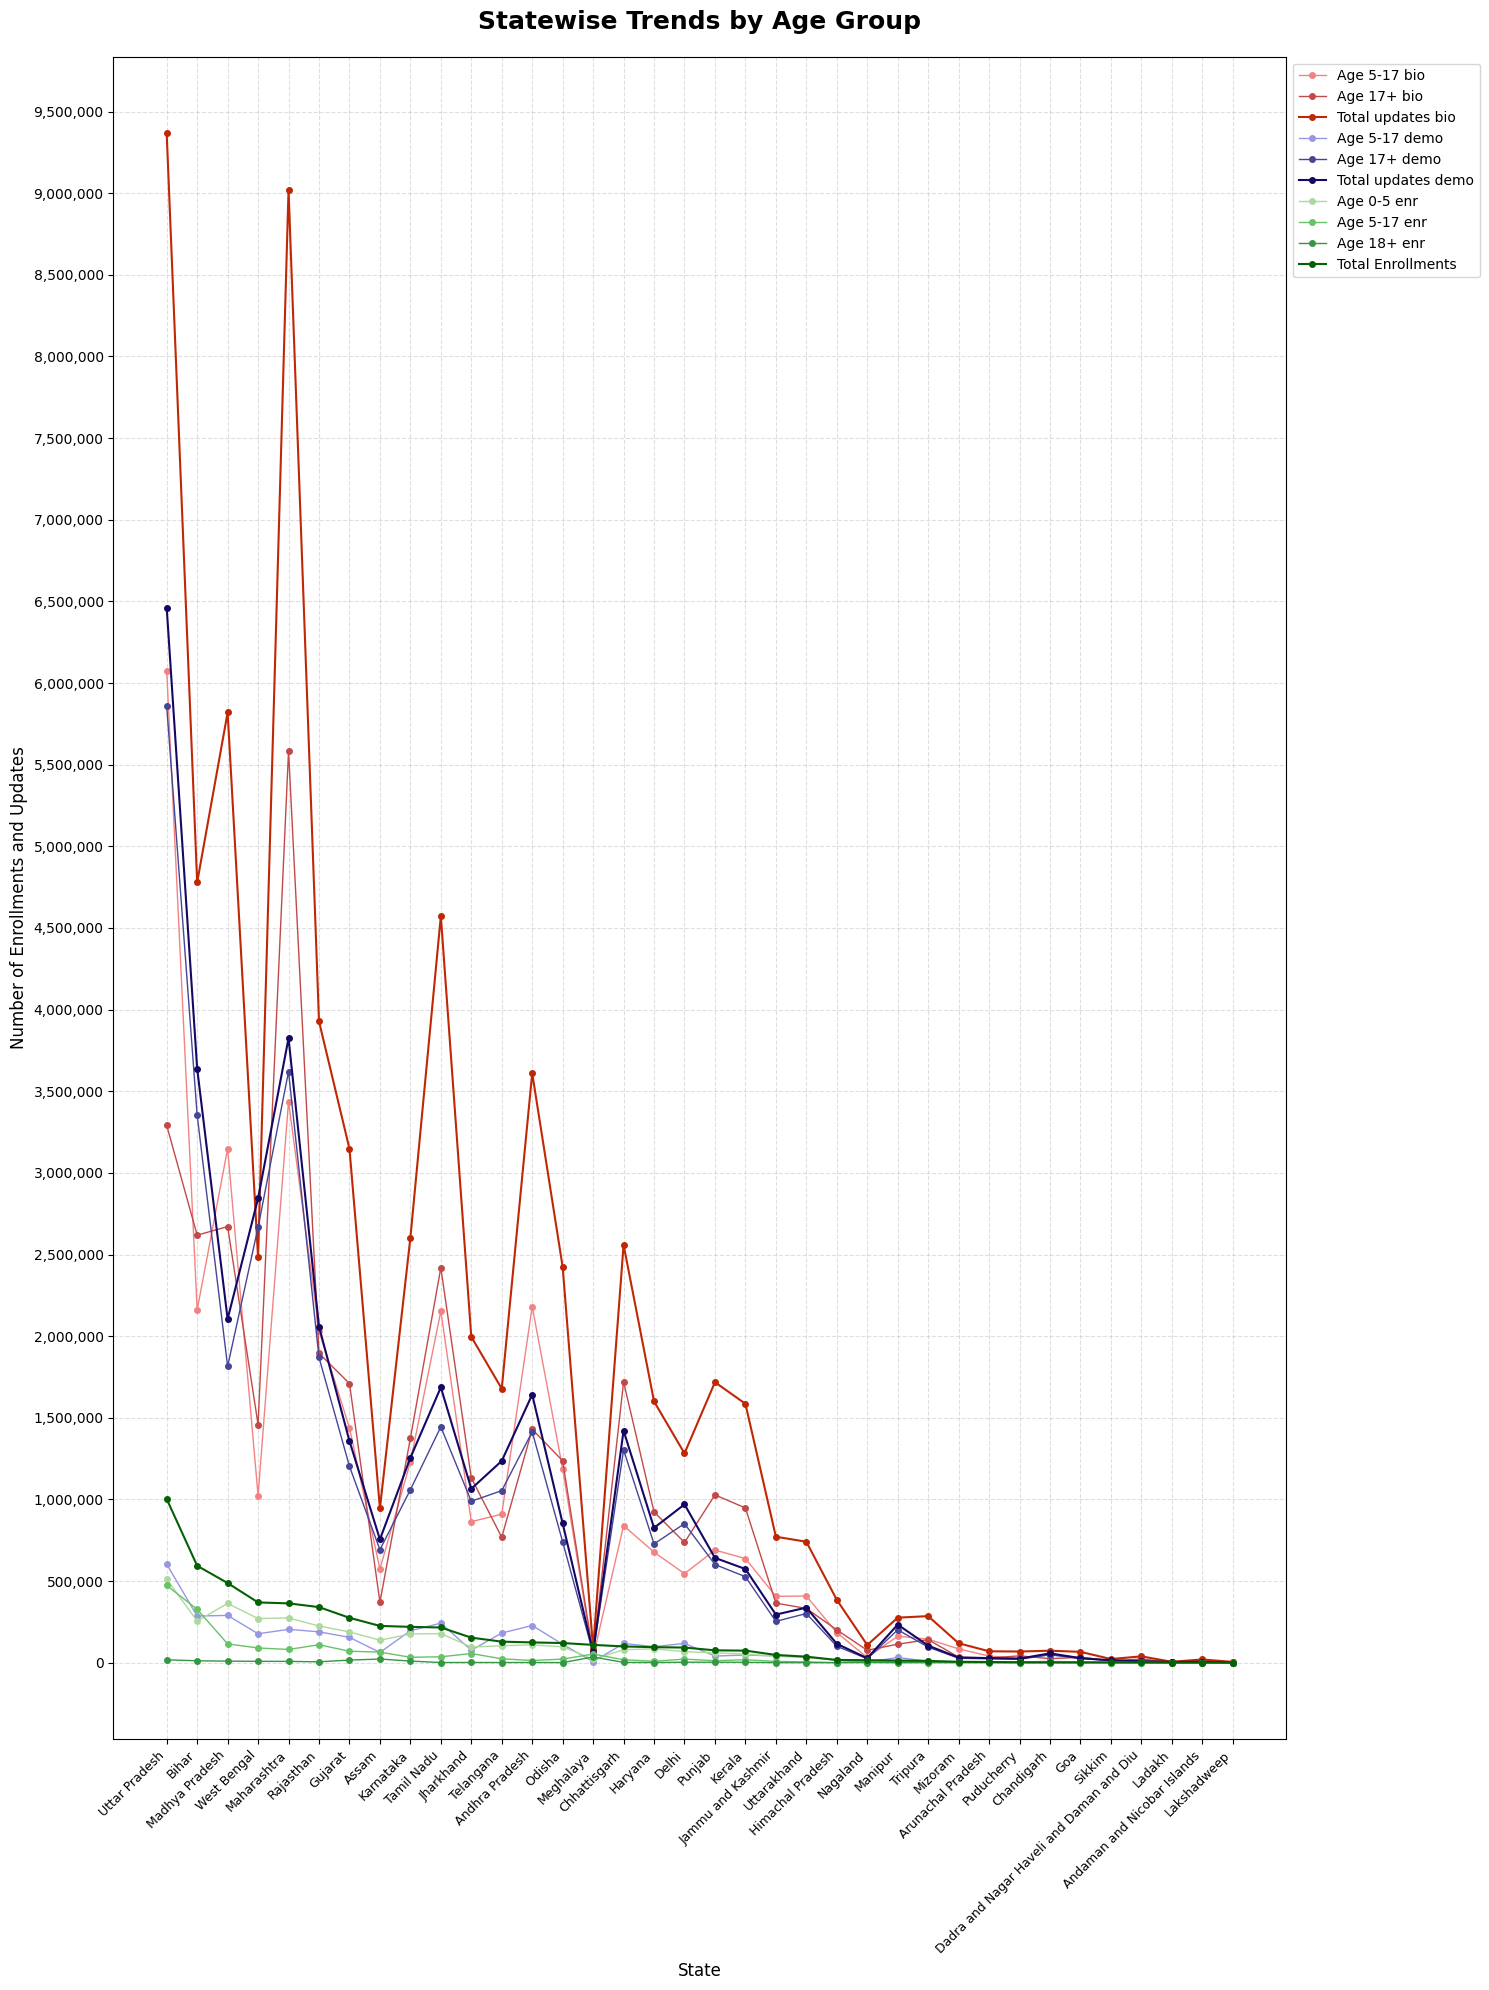

In [9]:
from matplotlib.ticker import ScalarFormatter, MultipleLocator

# 1. Prepare the data
state_names = dff.index.astype(str).tolist()

# Define a configuration list for easier maintenance
plot_configs = [
    # Biometric Updates
    {'col': 'bio_age_5_17', 'label': 'Age 5-17 bio', 'color': "#f38383"},
    {'col': 'bio_age_17_', 'label': 'Age 17+ bio', 'color': "#C24949"},
    {'col': 'total_biometric', 'label': 'Total updates bio', 'color': "#C02705", 'lw': 1.5},
    
    # Demographic Updates
    {'col': 'demo_age_5_17', 'label': 'Age 5-17 demo', 'color': "#9996E3"},
    {'col': 'demo_age_17_', 'label': 'Age 17+ demo', 'color': "#454697"},
    {'col': 'total_demographic', 'label': 'Total updates demo', 'color': "#150764", 'lw': 1.5},
    
    # Enrollments
    {'col': 'age_0_5', 'label': 'Age 0-5 enr', 'color': "#acda9d"},
    {'col': 'age_5_17', 'label': 'Age 5-17 enr', 'color': "#67C26A"},
    {'col': 'age_18_greater', 'label': 'Age 18+ enr', 'color': "#349842"},
    {'col': 'total_enrollments', 'label': 'Total Enrollments', 'color': "#056105", 'lw': 1.5}
]

# 2. Create the Plot
fig, ax = plt.subplots(figsize=(15, 20)) # Adjusted size for better screen fit

for config in plot_configs:
    ax.plot(
        state_names, 
        dff[config['col']], 
        label=config['label'], 
        color=config['color'], 
        marker='o', 
        markersize=4,
        linewidth=config.get('lw', 1) # Thicker lines for 'Total' columns
    )

# 3. Axis Formatting
ax.yaxis.set_major_locator(MultipleLocator(500000))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')

# Format Y-axis with commas for readability (e.g., 1,000,000)
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))
)

# 4. Customization
ax.set_title('Statewise Trends by Age Group', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Number of Enrollments and Updates', fontsize=12)

# Rotate labels and adjust spacing
plt.xticks(rotation=45, ha='right', fontsize=9)
ax.grid(True, which='major', linestyle='--', alpha=0.4)

# 5. Legend placement (Outside the plot)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, frameon=True)

plt.tight_layout()
plt.show()

The statewise Aadhaar activity pattern confirms that India now operates a tiered digital identity system. 

High-population states like Uttar Pradesh and Maharashtra function in maintenance mode, dominated by biometric and demographic updates.These states are Aadhaar “infrastructure hubs” where identity maintenance is continuous and large-scale. They already have near-saturated coverage and now operate in maintenance mode, not creation mode. 

Middle-tier states are rectification-heavy states, where Aadhaar exists but data quality, address correction, age transitions, and biometric refresh are dominant.

Southern states show maturity + low enrollment
- Tamil Nadu, Karnataka, Telangana, Kerala:
    They have:
    - High biometric
    - Moderate demographic
    - Low enrollments

Meaning:
Aadhaar coverage is mature. Activity is mostly about biometric refresh and demographic hygiene, not new registrations.

North-Eastern states remain in expansion mode, where enrollment still dominates. Across all regions, enrollment is overwhelmingly child-centric (0–5), biometric activity is adult-centric (17+), and demographic updates bridge the transition between the two. 

This establishes Aadhaar as a full lifecycle identity system rather than a one-time registration program.


Anomalies worth mentioning

Meghalaya:
- Age 18+ enrollment is unusually high compared to other states.
- Suggests late Aadhaar adoption or backlog adult coverage.

Assam:
- Enrollment Age 18+ is much higher than most states.
- Indicates delayed identity onboarding for adults.

Tamil Nadu:
- Very low adult enrollment → Aadhaar saturation confirmed.